# USPS DATASET CLASSIFICATION USING K NEAREST NEIGHBOR CLASSFIER

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import h5py
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
with h5py.File('usps.h5', 'r') as hf: 
    ls= list(hf.keys())
    print("Dataset in this file: ",ls)
    
    #acquiring traindataset
    train=hf.get('train')
    X_train = train.get('data')[:]
    y_train = train.get('target')[:]

    print("Shape of the dataset: ",X_train.shape)
    #acquiring testdataset
    test=hf.get('test')
    X_test = test.get('data')[:]
    y_test = test.get('target')[:]
    print("Shape of the dataset: ",X_test.shape)

Dataset in this file:  ['test', 'train']
Shape of the dataset:  (7291, 256)
Shape of the dataset:  (2007, 256)


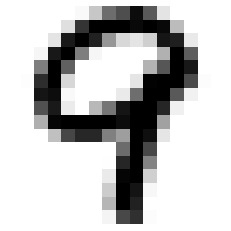

In [3]:
sample = X_test[0]
sampleimg = sample.reshape(16, 16)
plt.imshow(sampleimg, cmap='binary')
plt.axis('off')
plt.show()

In [4]:
y_test[0]

9

### Exhaustive Search using GridSearchCV
##### - Finding the best parameters for our model

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_jobs=-1)

In [6]:
grid = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': [3, 4, 5]
}
gridsearch = GridSearchCV(estimator=knn, param_grid=grid, scoring='accuracy', cv=5, verbose=3, n_jobs=-1)
gridsearch.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [7]:
gridsearch.best_score_

0.9661220126531221

In [8]:
gridsearch.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

### Training our model with the best parameters

In [9]:
#K=4
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4,n_jobs=-1,weights='distance')
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
print("Accuracy:",knn.score(X_test,y_test))

Accuracy: 0.9471848530144494


We've got an accuracy of **94.7%** !!! 

### Visualizing 5 test samples and their predicted value by our model


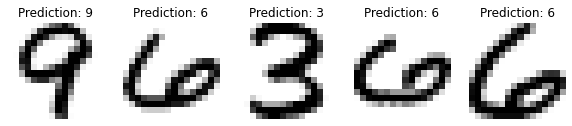

In [10]:
 fig,axs = plt.subplots(nrows=1, ncols=5, figsize=(10, 5))
for ax, image, prediction in zip(axs, X_test, preds):
    ax.set_axis_off()
    image = image.reshape(16, 16)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

### Confusion Matrix
#### -Let's visualize the performance of our model

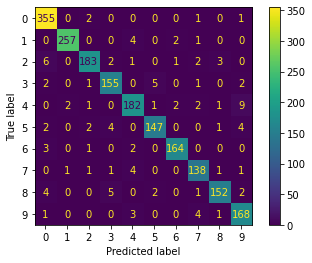

In [11]:
cm = confusion_matrix(y_test, preds, labels=knn.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
cmd.plot()
plt.show()